<a href="https://colab.research.google.com/github/Santhosh-1801/LGMVIP-DataScience/blob/main/TASK_2_DecisionTreeAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LetsGrowMore**

### **Beginner Level Task**

### **TASK 2-Prediction using Decision Tree Algorithm**

### **Author: Santhosh Kumar**



#### **Importing Required Libraries**

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#warnings
import warnings as wg
wg.filterwarnings("ignore")

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


 



#### **Reading CSV File**

In [2]:
iris_dataset=p.read_csv('/content/sample_data/iris (1).data',names=['sepal_length','sepal_width','petal_length','petal_width','Species'])

In [3]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_dataset.shape

(150, 5)

In [7]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [8]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_dataset.value_counts()

sepal_length  sepal_width  petal_length  petal_width  Species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

In [10]:
iris_dataset.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species          object
dtype: object

#### **Visualization**

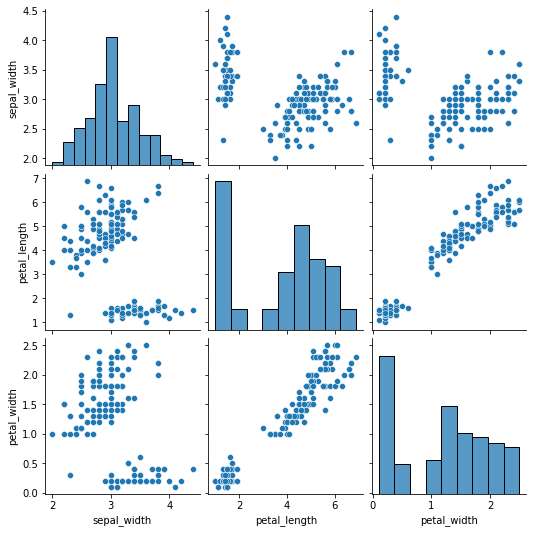

In [11]:
sns.pairplot(iris_dataset.iloc[:,1:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19431cd490>,
      dtype=object)

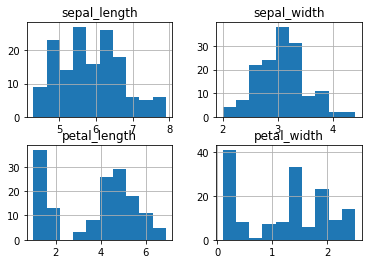

In [12]:
iris_dataset.hist()

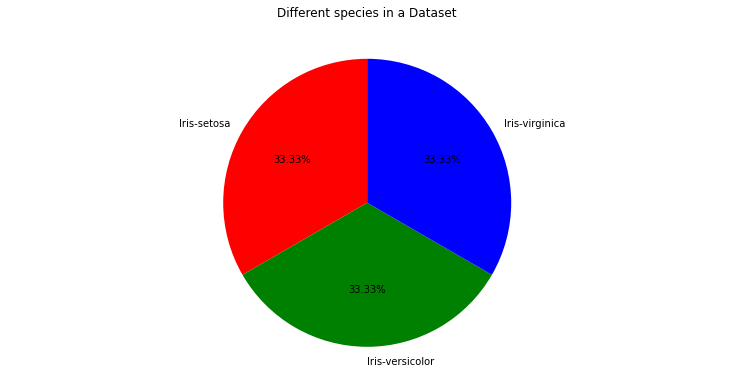

In [13]:
fig=plt.figure(figsize=(10,5))
axises=fig.add_axes([0,0,1,1])
axises.axis('equal')
colors=['red','green','blue']
new1=iris_dataset['Species'].unique()
new2=iris_dataset['Species'].value_counts().tolist()
axises.pie(new2,labels=new1,autopct='%1.2f%%',colors=colors,startangle=90)
plt.title("Different species in a Dataset")
plt.show()

In [14]:
#Checking the Skew in a Dataset
iris_dataset.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [15]:
#Checking the Duplicates
dupes=iris_dataset.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

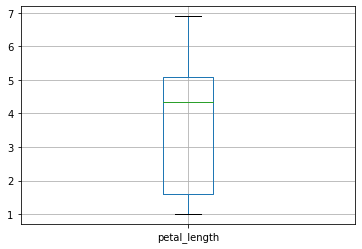

In [16]:
#Boxplot
iris_dataset.boxplot(column='petal_length')

In [17]:
#Checking measure of dispersion
iris_dataset.quantile(0.75)-iris_dataset.quantile(0.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

Text(0.5, 1.0, 'Species vs Sepal Length')

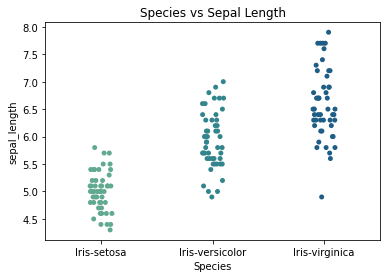

In [18]:
sns.stripplot(x='Species',y='sepal_length',data=iris_dataset,palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

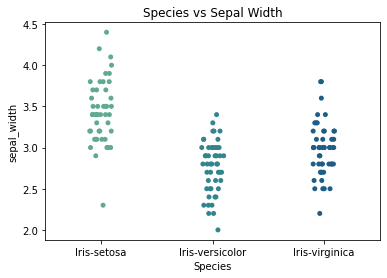

In [19]:
sns.stripplot(x='Species',y='sepal_width',data=iris_dataset,palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

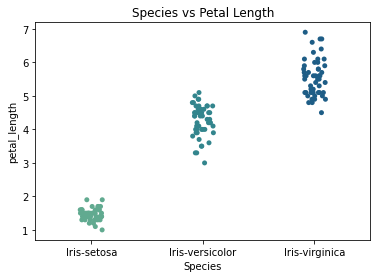

In [20]:
sns.stripplot(x='Species',y='petal_length',data=iris_dataset,palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

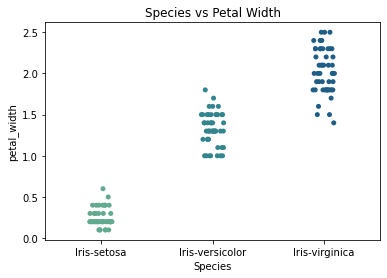

In [21]:
sns.stripplot(x='Species',y='petal_width',data=iris_dataset,palette='crest')
plt.title('Species vs Petal Width')

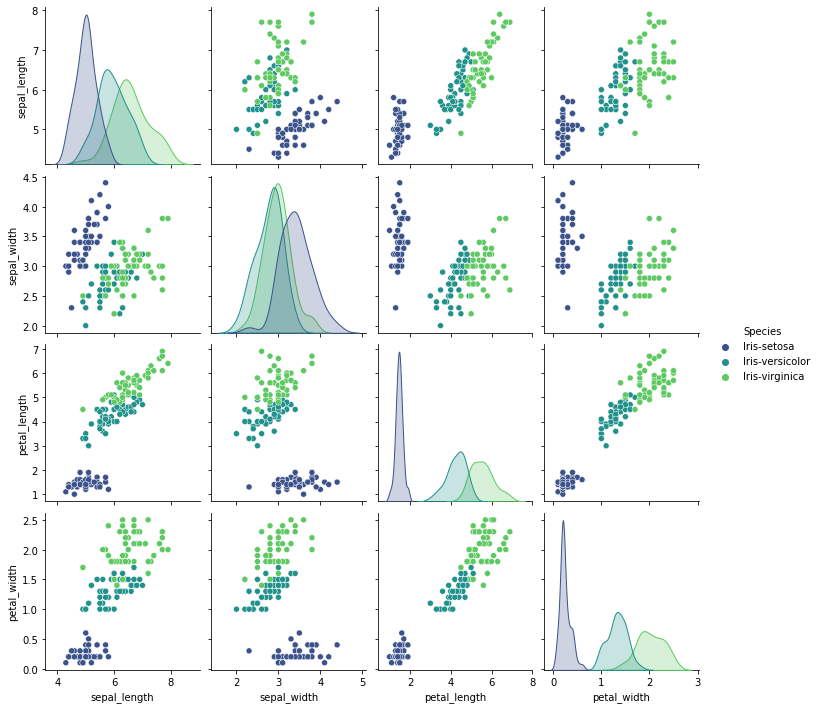

In [22]:
sns.pairplot(iris_dataset, hue = 'Species',palette='viridis')
plt.show()

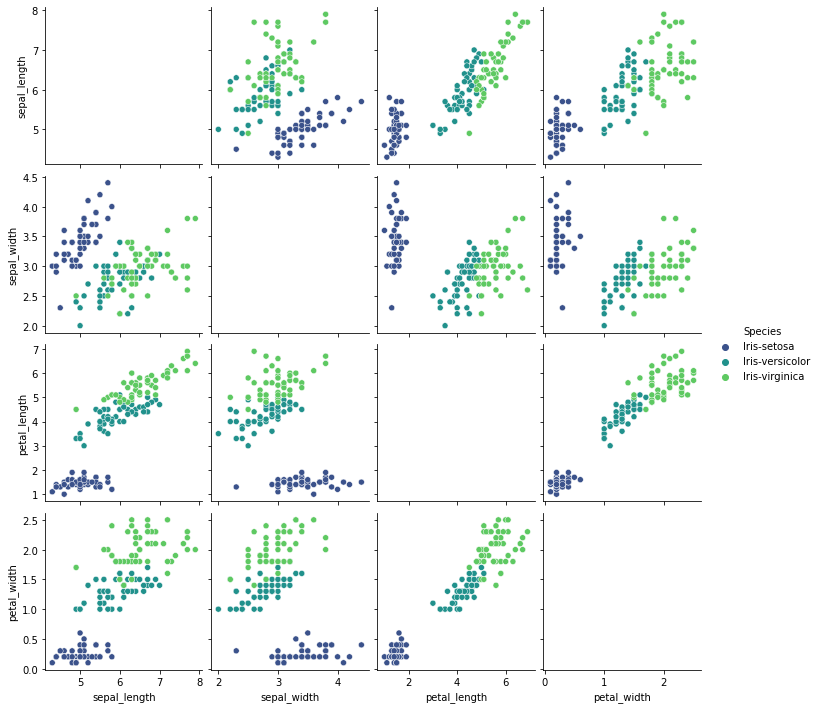

In [23]:
sns.pairplot(iris_dataset, hue = 'Species',palette='viridis',diag_kind='reg')
plt.show()

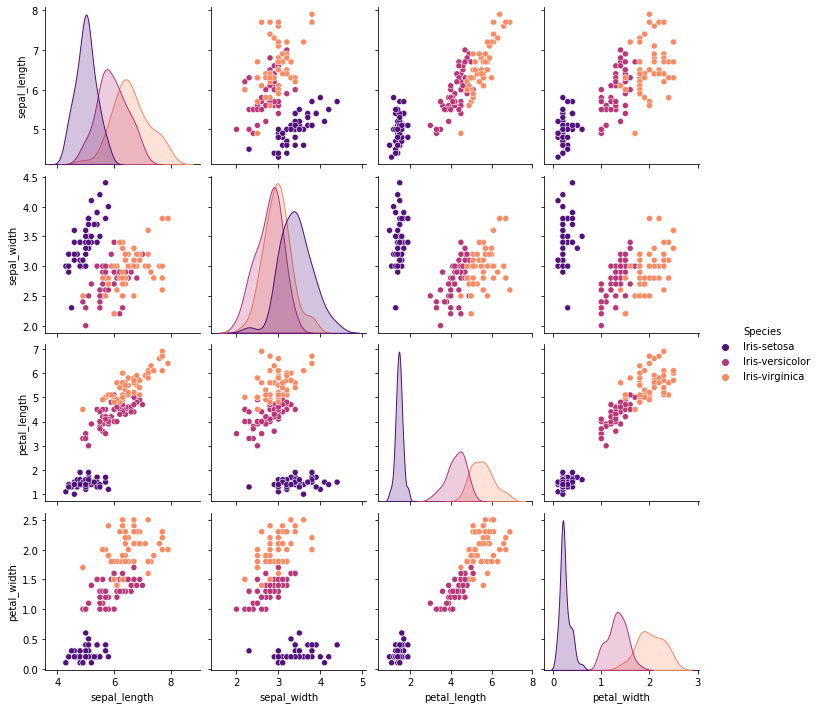

In [24]:
sns.pairplot(iris_dataset, hue = 'Species',palette='magma',diag_kind='kde')
plt.show()

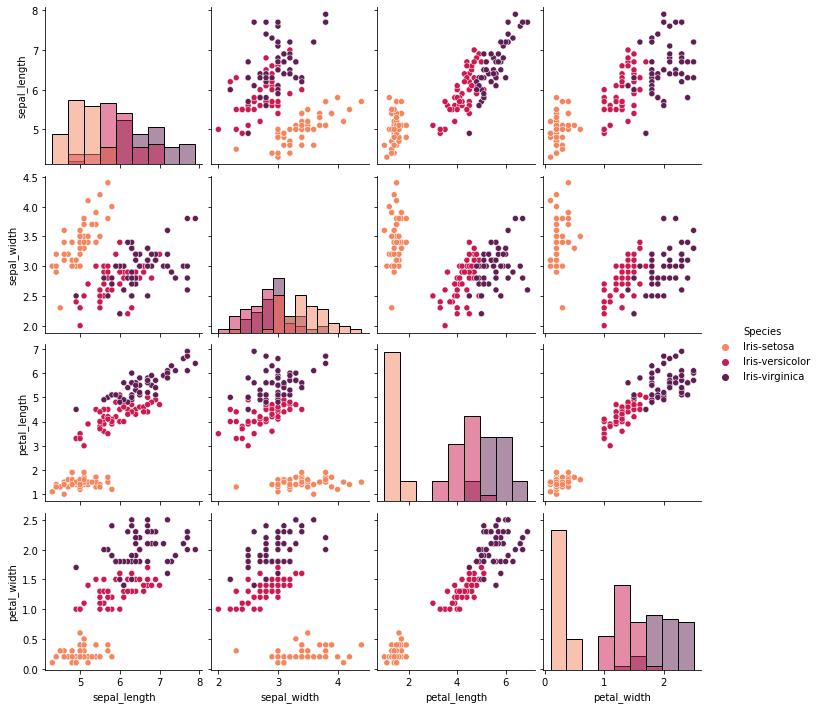

In [25]:
sns.pairplot(iris_dataset, hue = 'Species',palette='rocket_r',diag_kind='hist')
plt.show()

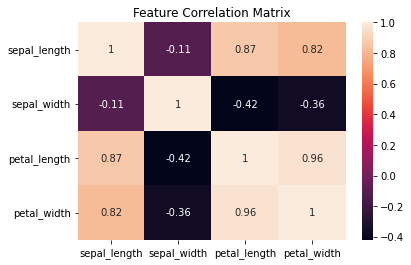

In [26]:
matrix=iris_dataset.corr()
corrs=sns.heatmap(matrix,annot=True)
corrs.set_title("Feature Correlation Matrix")
plt.show()

#### **Decision Tree**

In [27]:
x=iris_dataset.drop('Species',axis=1)
y=iris_dataset['Species']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=1)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [30]:
#Printing the score of Decision Tree
print(model.score(X_test,Y_test))

0.9555555555555556


In [31]:
Y_pred=model.predict(X_test)
print(Y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


In [32]:
sc=DecisionTreeClassifier(criterion='entropy',random_state=20)
sc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [33]:
from sklearn import metrics
new_y_pred1=sc.predict(X_test)
predicted1=new_y_pred1
actual_value=Y_test
print("Accuracy is:",accuracy_score(Y_test,new_y_pred1))
print('Recall : {}'.format(metrics.recall_score(Y_test, new_y_pred1, average='macro')))
print('Precision :{}'.format(metrics.precision_score(Y_test, new_y_pred1, average='macro')))
print('confusion matrix: \n',confusion_matrix(actual_value,predicted1))

Accuracy is: 0.9555555555555556
Recall : 0.9558404558404558
Precision :0.9558404558404558
confusion matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [34]:
print(metrics.classification_report(Y_test,new_y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [35]:
feature_names = iris_dataset.columns[:4]
target_names = iris_dataset['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

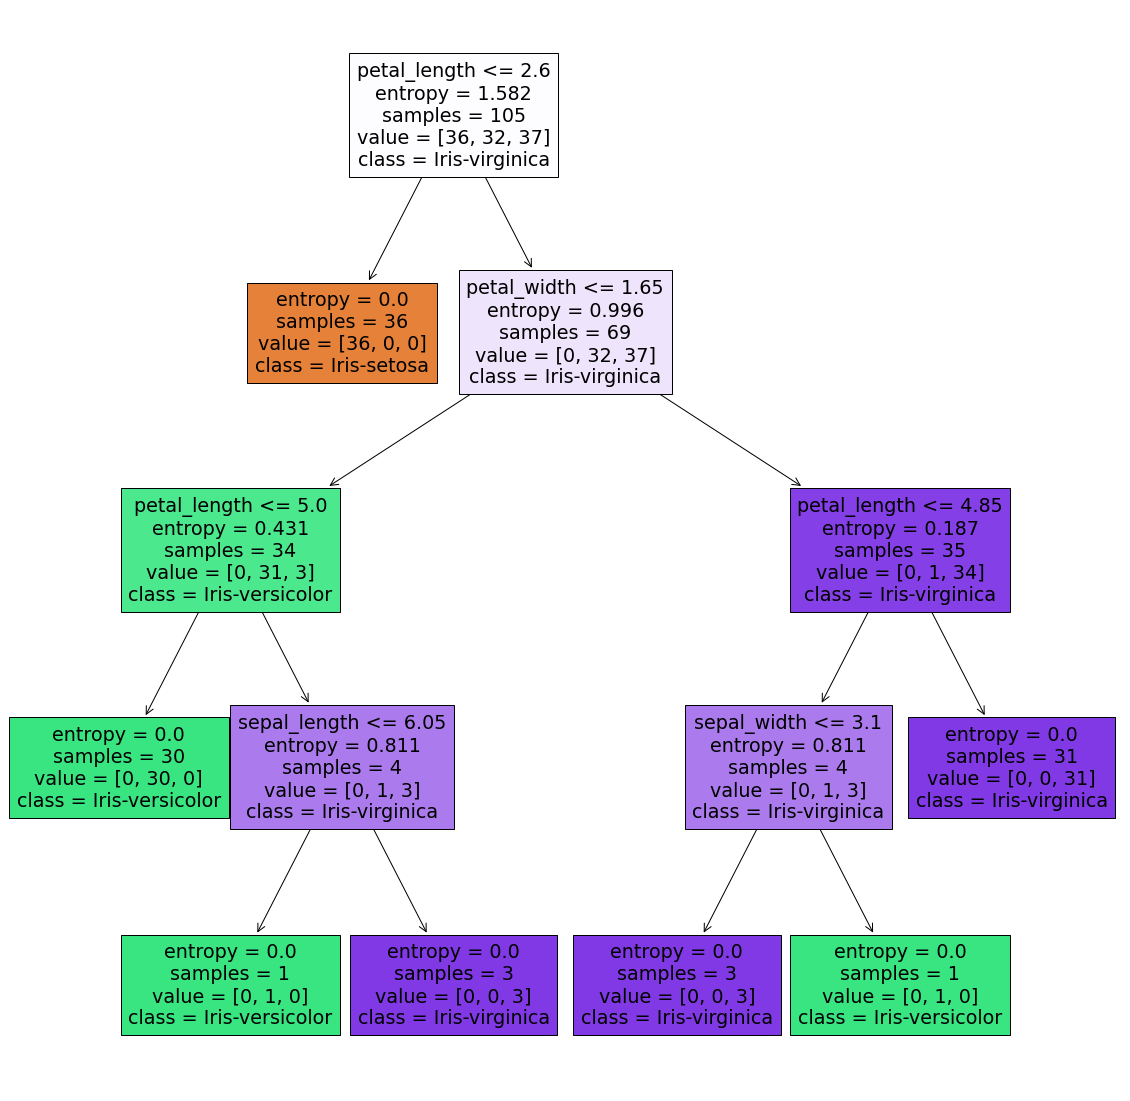

In [36]:
features = iris_dataset.columns[:-1]
classes = iris_dataset['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(sc, feature_names=features, class_names=classes, filled=True)
plt.show()